In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#load the data
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#check the columns name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
#Checking the data shape
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 8807 rows and 12 columns


In [5]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Checking the null values in the dataset
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

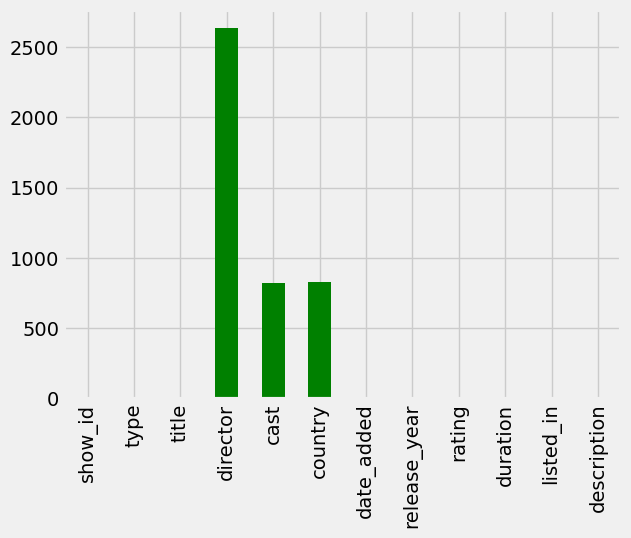

In [75]:
df.isnull().sum().plot(kind='bar',color='green')

In [8]:
# Remove missing values from the DataFrame
netflix=df.dropna()

# After removing missing values, check the data shape
print(f'The dataset contains {netflix.shape[0]} rows and {netflix.shape[1]} columns')

The dataset contains 5332 rows and 12 columns


In [9]:
# Checking the duplicate values in the data
duplicate_values=df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


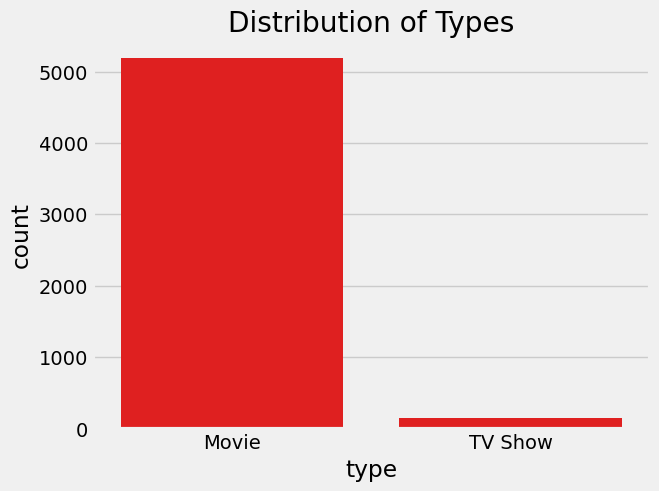

In [49]:
# Create a count plot for the 'type' column with red color
sns.countplot(data=netflix, x='type', color='red')

# Set the title of the plot
plt.title('Distribution of Types')

# Display the plot
plt.show()

In [11]:
# Select rows where 'type' is 'Movie'
movie = netflix[netflix['type'] == 'Movie']

In [12]:
# Remove 'min' suffix from values in the 'duration' column and convert to integers
movie['duration'] = movie['duration'].str.replace(' min', '').astype(int)

In [51]:
# check data types of movie duration
print(movie['duration'].dtype)

int32


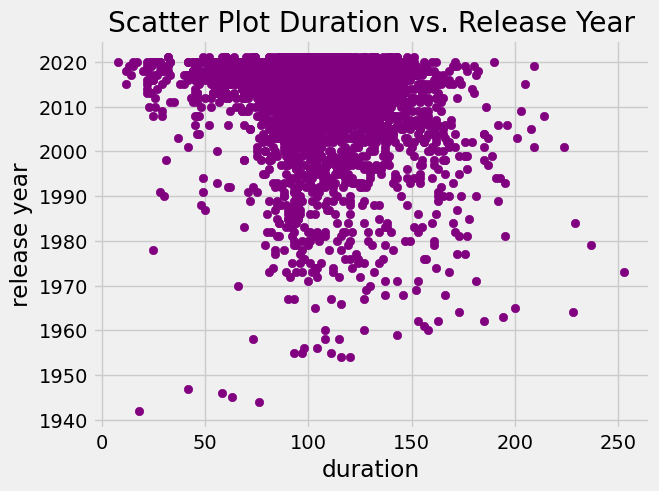

In [64]:
plt.scatter(movie['duration'], movie['release_year'], color='purple')

plt.xlabel('duration')
plt.ylabel('release year')
plt.title('Scatter Plot Duration vs. Release Year')

plt.show()

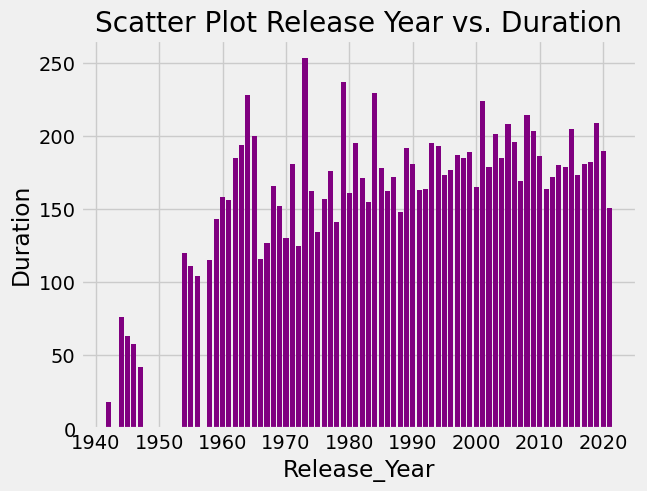

In [66]:
plt.bar(movie['release_year'], movie['duration'], color='purple')

plt.xlabel('Release_Year')
plt.ylabel('Duration')
plt.title('Scatter Plot Release Year vs. Duration')

plt.show()

In [68]:
min_duration_index = movie['duration'].idxmin()

corresponding_min_release_year = movie.loc[min_duration_index, 'release_year']
min_duration = movie.loc[min_duration_index, 'duration']

print(f"The movie with the minimum duration of {min_duration} minutes was released in the year {corresponding_min_release_year}.")

max_duration_index = movie['duration'].idxmax()

corresponding_max_release_year = movie.loc[max_duration_index, 'release_year']
max_duration = movie.loc[max_duration_index, 'duration']

print(f"The movie with the maximum duration of {max_duration} minutes was released in the year {corresponding_max_release_year}.")

The movie with the minimum duration of 8 minutes was released in the year 2020.
The movie with the maximum duration of 253 minutes was released in the year 1973.


In [22]:
# Count the occurrences of each unique entry in the 'listed_in' column
genre_counts = movie['listed_in'].value_counts()

# Display the genre counts
print("Genre Counts:")
print(genre_counts)

Genre Counts:
listed_in
Dramas, International Movies                                        336
Stand-Up Comedy                                                     286
Comedies, Dramas, International Movies                              257
Dramas, Independent Movies, International Movies                    243
Children & Family Movies, Comedies                                  179
                                                                   ... 
Action & Adventure, Children & Family Movies, Independent Movies      1
LGBTQ Movies, Thrillers                                               1
Sci-Fi & Fantasy                                                      1
Children & Family Movies, Comedies, Cult Movies                       1
Cult Movies, Dramas, Thrillers                                        1
Name: count, Length: 268, dtype: int64


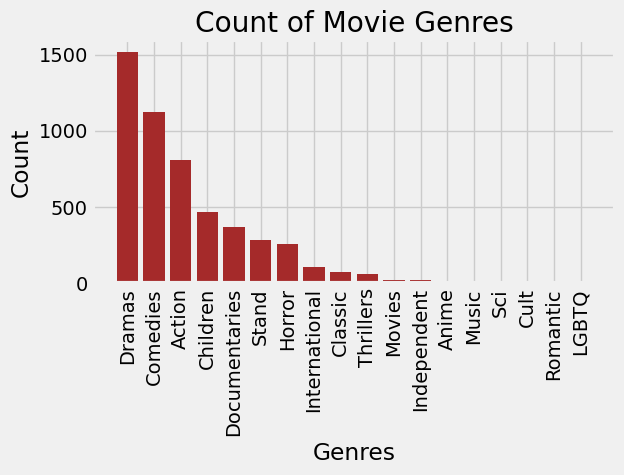

In [54]:
# Extract genres from the 'listed_in' column
movie['genres'] = movie['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)

# Count the occurrences of each genre
genre_counts_movie = movie['genres'].value_counts().reset_index()

# Rename the columns to 'genre' and 'count'
genre_counts_movie.columns = ['genre', 'count']

# Create a bar plot of genre counts
plt.figure(figsize=(6, 3))
plt.bar(genre_counts_movie['genre'], genre_counts_movie['count'], color='brown')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Movie Genres')
plt.xticks(rotation=90)
plt.show()

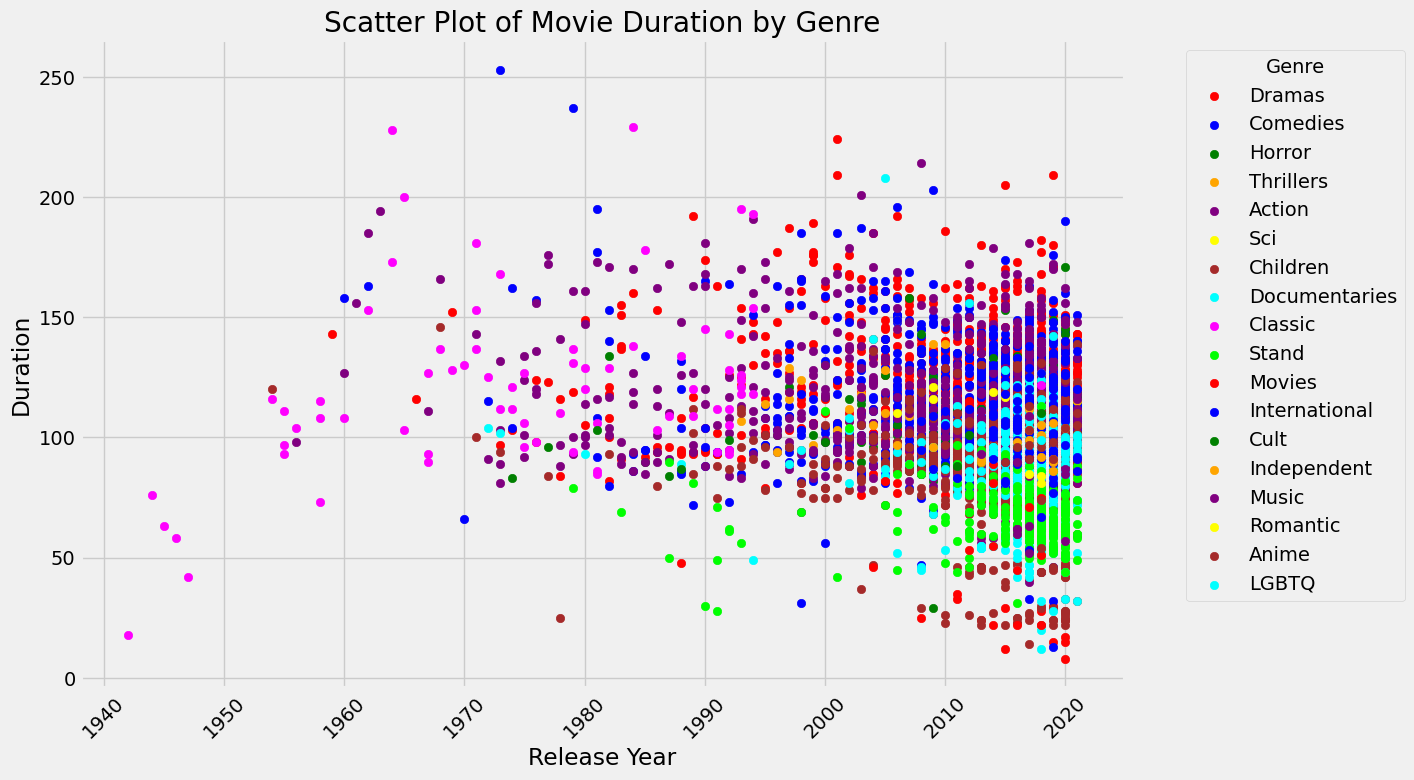

In [55]:
# Apply the 'fivethirtyeight' style
plt.style.use('fivethirtyeight')

# Define new colors for each genre
new_colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'brown', 'cyan', 'magenta', 'lime']

# Create scatter plot with new colors for each genre
plt.figure(figsize=(12, 8))
for i, genre in enumerate(movie['genres'].unique()):
    plt.scatter(
        movie['release_year'][movie['genres'] == genre], 
        movie['duration'][movie['genres'] == genre], 
        label=genre, 
        color=new_colors[i % len(new_colors)]  # Use modulus to repeat colors if needed
    )

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Scatter Plot of Movie Duration by Genre')
plt.xticks(rotation=45)

# Position the legend outside the plot area
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

In [78]:
# Change the x data to movie['duration']
trace = go.Histogram(
    x=movie['duration'],  # Use movie duration for x-axis
    xbins=dict(size=0.5),
    marker=dict(color='rgb(26, 118, 255)')
)

layout = go.Layout(
    template="plotly",  # Dark theme layout
    title='Distribution of Movie Durations',  # Title of the plot
    xaxis=dict(title='Duration (Minutes)')  # X-axis label
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [41]:
movie['rating'].value_counts()

rating
TV-MA       1741
TV-14       1177
R            778
PG-13        470
TV-PG        416
PG           275
TV-G          81
TV-Y          71
TV-Y7         70
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: count, dtype: int64

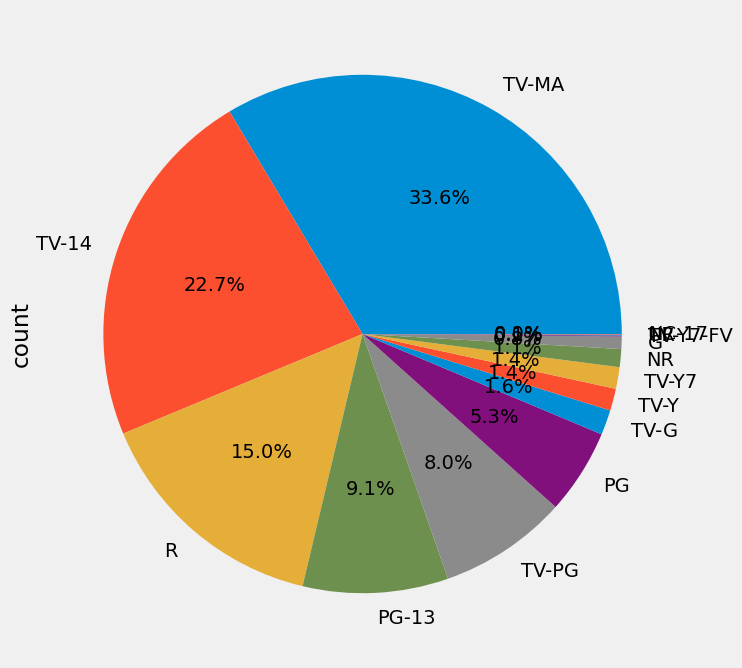

In [79]:
# Plot a pie chart to visualize the distribution of movie ratings
movie['rating'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Add percentage labels to each wedge
    #shadow=True,  # Add shadow effect to the pie chart
    figsize=(10, 8)  # Set the size of the figure
)

# Display the pie chart
plt.show()